# GAN
- Generative Adversarial Network
- 생산적 적대 신경망

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = np.load("/Users/changmin.kim/Desktop/jupyterNotebook/Hands_on_Machine_Learning/dir/train_data.npy")
label = np.load("/Users/changmin.kim/Desktop/jupyterNotebook/Hands_on_Machine_Learning/dir/train_label.npy")

In [3]:
# hyperparameter

total_epoch = 100
batch_size = 100
learning_rate = 0.0002
n_hidden = 256
n_input = 28*28
n_noise = 128 # 생성자의 입력값으로 사용할 노이즈의 크기

In [4]:
def random_batch(batch_size,data):
    result = np.arange(0,len(data))
    np.random.shuffle(result)
    result = result[:100]
    dataset = [data[i] for i in result]
    return np.array(dataset)

In [5]:
def normalization(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))

In [6]:
def standardization(data):
    mean = np.mean(data)
    std = np.std(data)
    datas = (data-np.mean(data))/np.std(data)
    return datas

In [7]:
X = tf.placeholder(tf.float32,[None,n_input])
Z = tf.placeholder(tf.float32,[None,n_noise])

In [8]:
G_W1 = tf.Variable(tf.random_normal([n_noise,n_hidden],stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))

G_W2 = tf.Variable(tf.random_normal([n_hidden,n_input],stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

In [9]:
D_W1 = tf.Variable(tf.random_normal([n_input,n_hidden],stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))

D_W2 = tf.Variable(tf.random_normal([n_hidden,1],stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))

In [10]:
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    return output

In [11]:
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs,D_W1)+D_b1)
    output = tf.sigmoid(tf.matmul(hidden,D_W2)+D_b2)
    return output

In [12]:
def get_noise(batch_size,n_noise):
    return np.random.normal(size=(batch_size,n_noise)).astype(np.float32)

In [13]:
G = generator(Z)
D_gene = discriminator(G)
D_real = discriminator(X)

In [14]:
loss_D = tf.reduce_mean(tf.log(D_real)+tf.log(1-D_gene))
loss_G = tf.reduce_mean(tf.log(D_gene))

In [15]:
D_var_list = [D_W1,D_b1,D_W2,D_b2]
G_var_list = [G_W1,G_b1,G_W2,G_b2]

In [16]:
train_D = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(-loss_D,var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(-loss_G,var_list=G_var_list)

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(len(data)/batch_size)
data = normalization(data)
loss_val_D, loss_val_G =0,0

In [18]:
print(data[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.   0.   3.   0.
   0.   8.   5.   0.   3.  12.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   4.   1.  10.
   8.   0.   1.   0.   0.   0.   0.   0.   8.  10.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   0.   0.   9.   0.
   0.   7.   0.  14.  18.   9.   5.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   9.   7.   0.   8.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  12.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  13.   0.   0.   2.  74. 186.
 255. 252.  23.  16.   0.   0.  15.   9.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   9.  17.  75. 239. 252.
 234. 255.  26.  84.  78.   6.   0.   9.  17.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   8.   0. 124. 243. 255. 234.
 255. 255. 214. 255. 244. 115.   4.   0.  10.   0.   0.   0.   0.   0.
   0. 

Epoch: 0000 D loss: nan G loss: nan
Epoch: 0001 D loss: nan G loss: nan


KeyboardInterrupt: 

/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:885: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to 

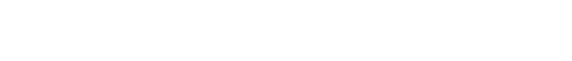

In [19]:
for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs = random_batch(batch_size,data)
        noise = get_noise(batch_size, n_noise)

        # 판별기와 생성기 신경망을 각각 학습시킵니다.
        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))
    
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))


print('최적화 완료!')

In [66]:
print(np.shape(D_W1))
print(np.shape(D_W2))
print(0.000000000000000000000000000000000131320011313*0.000000000000000000000000000000001232)
tf.nn.sigmoid(np.mean(sess.run(G_W2)[0]*data[0]))
print(sess.run((D_W1[200])))
sess.run(tf.matmul(data[:1],D_W1))

(784, 256)
(256, 1)
1.6178625393761602e-67
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan

In [50]:
print(1/np.inf)
print(np.inf/np.inf)
print(1.e1000)
print(1.e1000/1.e1000)

0.0
nan
inf
nan


NaN =  NaN을 포함하는 산술 연산을 수행하는 경우와 마찬가지로, 0/0 및 inf/inf와 같은 표현식은 NaN을 반환<br>
inf = 무한대는 0으로 나누기(Division By Zero)나 오버플로와 같은 연산에서 초래되며, 이와 같은 연산은 기존의 부동소수점 값으로 나타내기에는 너무 큰 값을 발생

In [49]:
1/np.nan

nan

In [47]:
np.nan

nan

In [59]:
1-1.e1000/0.0000000000001

-inf

In [61]:
np.inf

inf